Instalando as bibliotecas

In [1]:
#pip install matplotlib
#pip install seaborn

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

import warnings
warnings.filterwarnings('ignore')

In [3]:
conn = ps.connect(dbname='postgres'
    ,user='postgres'
    ,password='Giulia0050!'
    ,host='localhost'
    ,port='5432')

In [4]:
sql = """
SELECT * from ipea.preco_combustivel 
"""

In [5]:
df = sqlio.read_sql_query(sql, conn)

In [6]:
df.head()

,data_cotacao,valor_cotacao
0,2023-12-29,77.69
1,2023-12-28,79.04
2,2023-12-27,80.97
3,2023-12-26,80.23
4,2023-12-22,80.23


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_cotacao   1596 non-null   object 
 1   valor_cotacao  1596 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [8]:
#convertendo a data 
df["data_cotacao"] = pd.to_datetime(df["data_cotacao"])

In [9]:
df.shape

(1596, 2)

In [10]:
df.isnull().sum()

data_cotacao     0
valor_cotacao    0
dtype: int64

In [11]:
df_ipea = df[['data_cotacao', 'valor_cotacao']]

In [12]:
df_ipea['ano'] = df_ipea['data_cotacao'].dt.year
df_ipea['mes'] = df_ipea['data_cotacao'].dt.month
df_ipea['dia'] = df_ipea['data_cotacao'].dt.day

In [13]:
df_ipea.head()

,data_cotacao,valor_cotacao,ano,mes,dia
0,2023-12-29,77.69,2023,12,29
1,2023-12-28,79.04,2023,12,28
2,2023-12-27,80.97,2023,12,27
3,2023-12-26,80.23,2023,12,26
4,2023-12-22,80.23,2023,12,22


In [14]:
df_ipea.describe().round(2)

,data_cotacao,valor_cotacao,ano,mes,dia
count,1596,1596.00,1596.00,1596.00,1596.00
mean,2020-11-19 21:43:45.563909888,71.76,2020.39,6.46,15.68
min,2018-01-01 00:00:00,9.12,2018.00,1.00,1.00
25%,2019-04-23 18:00:00,62.11,2019.00,3.00,8.00
50%,2020-11-04 12:00:00,71.94,2020.00,6.50,16.00
75%,2022-06-03 18:00:00,82.35,2022.00,9.00,23.00
max,2023-12-29 00:00:00,133.18,2023.00,12.00,31.00
std,NaN,19.74,1.74,3.45,8.71


In [15]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\giuliasilva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\giuliasilva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


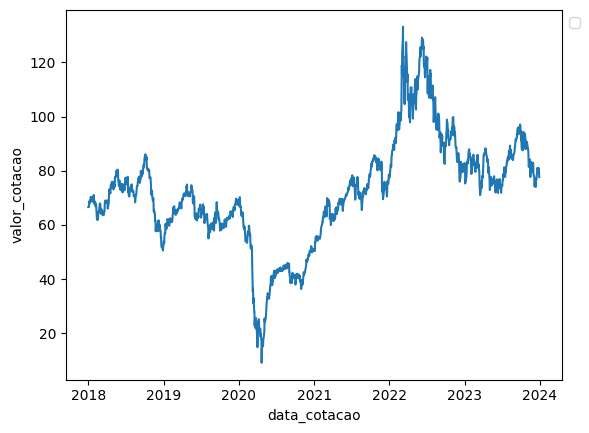

In [18]:
ax = sns.lineplot(data=df_ipea, x="data_cotacao", y='valor_cotacao')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [19]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.boxplot(x=x, y= y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14);

In [20]:
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)

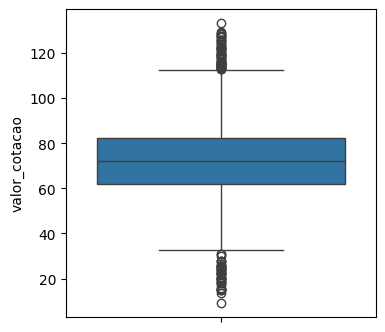

In [21]:
plotar_boxplot_geral('valor_cotacao', df_ipea)


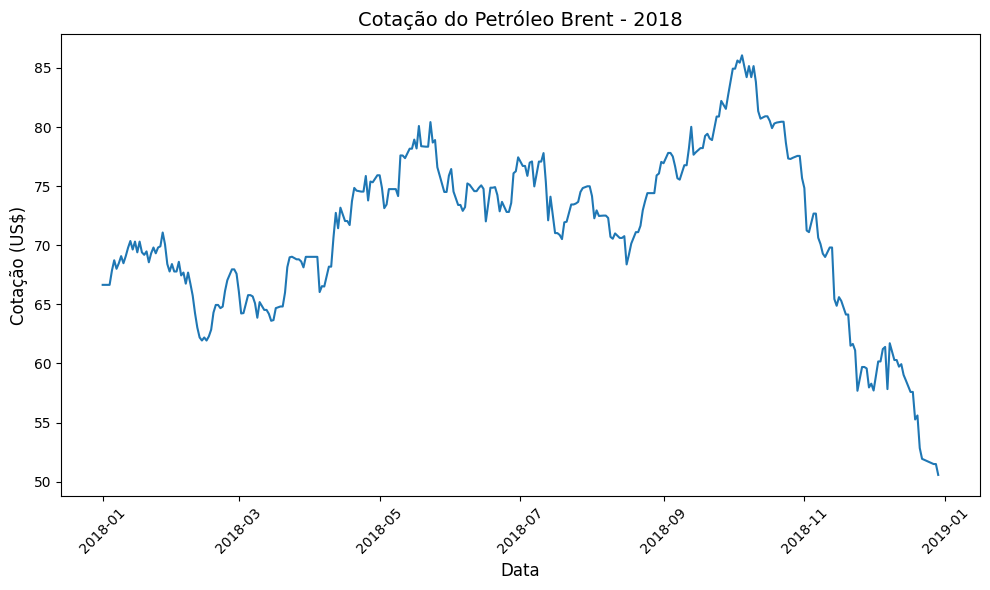

In [22]:
# Filtrar os dados apenas para o ano de 2018
df_2018 = df_ipea[df_ipea['data_cotacao'].dt.year == 2018]

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2018, x="data_cotacao", y="valor_cotacao")
ax.set_title("Cotação do Petróleo Brent - 2018", fontsize=14)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Cotação (US$)", fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [23]:
df_2018_fim = df_ipea[df_ipea['data_cotacao'].dt.month.isin([10, 11, 12])]


In [24]:
df_2018_fim.describe()


,data_cotacao,valor_cotacao,ano,mes,dia
count,391,391.000000,391.000000,391.000000,391.000000
mean,2021-04-09 13:04:27.007672576,71.326394,2020.401535,10.969309,15.611253
min,2018-10-01 00:00:00,36.330000,2018.000000,10.000000,1.000000
25%,2019-10-30 12:00:00,60.115000,2019.000000,10.000000,8.000000
50%,2020-12-22 00:00:00,75.240000,2020.000000,11.000000,15.000000
75%,2022-11-07 12:00:00,83.400000,2022.000000,12.000000,23.000000
max,2023-12-29 00:00:00,99.870000,2023.000000,12.000000,31.000000
std,NaN,16.077939,1.729057,0.815918,8.785610


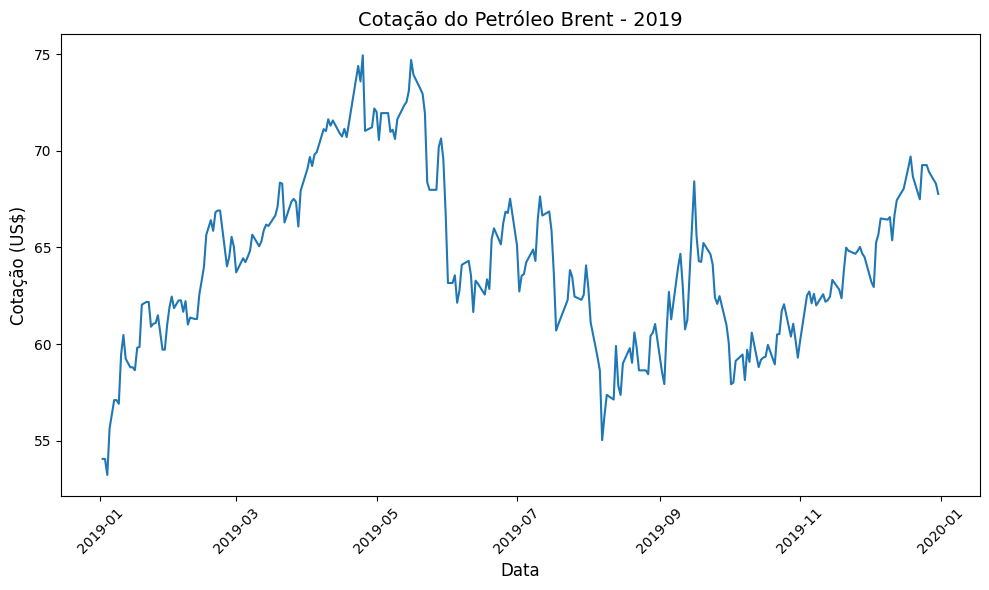

In [25]:
# Filtrar os dados apenas para o ano de 2019
df_2019 = df_ipea[df_ipea['data_cotacao'].dt.year == 2019]

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2019, x="data_cotacao", y="valor_cotacao")
ax.set_title("Cotação do Petróleo Brent - 2019", fontsize=14)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Cotação (US$)", fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [26]:
df_2019.describe()

,data_cotacao,valor_cotacao,ano,mes,dia
count,264,264.000000,264.0,264.000000,264.000000
mean,2019-06-27 06:16:21.818181888,64.136780,2019.0,6.375000,15.549242
min,2019-01-02 00:00:00,53.230000,2019.0,1.000000,1.000000
25%,2019-03-25 18:00:00,61.032500,2019.0,3.000000,8.000000
50%,2019-06-26 12:00:00,63.590000,2019.0,6.000000,15.000000
75%,2019-09-26 06:00:00,66.852500,2019.0,9.000000,23.000000
max,2019-12-31 00:00:00,74.940000,2019.0,12.000000,31.000000
std,NaN,4.380269,0.0,3.480459,8.840660


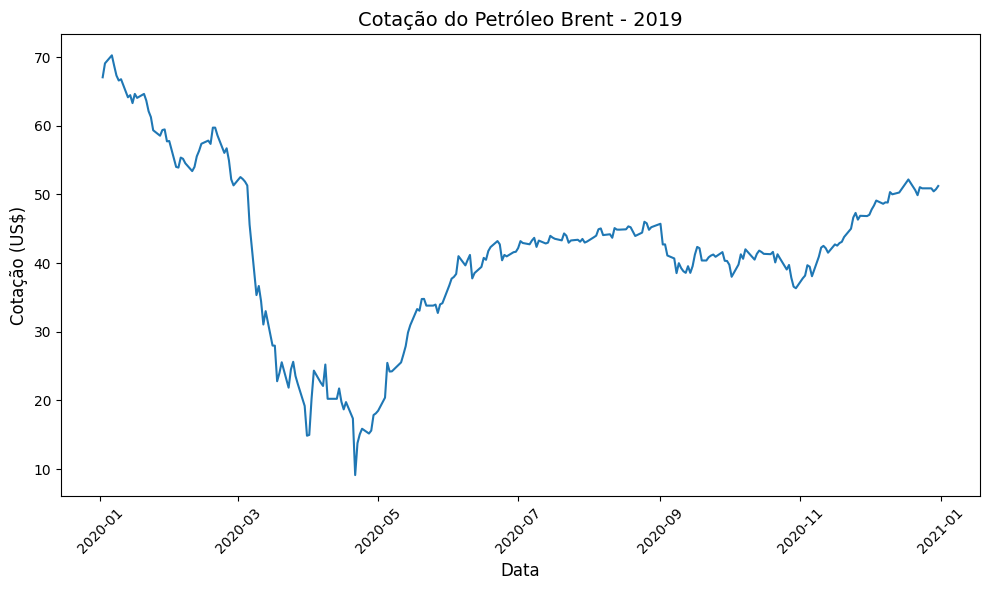

In [27]:
# Filtrar os dados apenas para o ano de 2019
df_2020 = df_ipea[df_ipea['data_cotacao'].dt.year == 2020]

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2020, x="data_cotacao", y="valor_cotacao")
ax.set_title("Cotação do Petróleo Brent - 2019", fontsize=14)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Cotação (US$)", fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [28]:
df_2020.describe()

,data_cotacao,valor_cotacao,ano,mes,dia
count,257,257.000000,257.0,257.000000,257.000000
mean,2020-06-30 22:41:33.385213952,41.710817,2020.0,6.494163,15.789883
min,2020-01-02 00:00:00,9.120000,2020.0,1.000000,1.000000
25%,2020-04-01 00:00:00,37.860000,2020.0,4.000000,8.000000
50%,2020-07-02 00:00:00,42.180000,2020.0,7.000000,16.000000
75%,2020-09-28 00:00:00,47.300000,2020.0,9.000000,23.000000
max,2020-12-31 00:00:00,70.250000,2020.0,12.000000,31.000000
std,NaN,12.015907,0.0,3.422262,8.803110
